In [1]:
import json
import os
import math
from tqdm import tqdm

def load_game(filename: str) -> dict:
    """Load game data from a JSON file."""
    with open(filename, 'r') as file:
        data = json.load(file)
    return data


games = []
game_path = os.path.join(".", "crawler", "games", "classic")

for file in tqdm(os.listdir(game_path)):
    if file.endswith(".json"):
        game_data = load_game(os.path.join(game_path, file))
        games.append(game_data)

print(f"Loaded {len(games)} games.")

players = []
players_name_lvl = {}
for game in tqdm(games):
    for participant in game.get("info").get("participants", []):
        players_name_lvl[participant.get("riotIdGameName") + " #" + participant.get("riotIdTagline")] = participant.get("summonerLevel", 0)

for name, level in players_name_lvl.items():
    players.append((name, level))

print(f"Unique players: {len(players)}")



100%|██████████| 27355/27355 [05:37<00:00, 81.01it/s]


Loaded 27355 games.


100%|██████████| 27355/27355 [00:00<00:00, 63080.86it/s]

Unique players: 202390


In [2]:
from analysis.core import *

In [3]:
len(get_all_participants(games))

100%|██████████| 27355/27355 [00:00<00:00, 93077.99it/s]

202018 total number of players.


202018

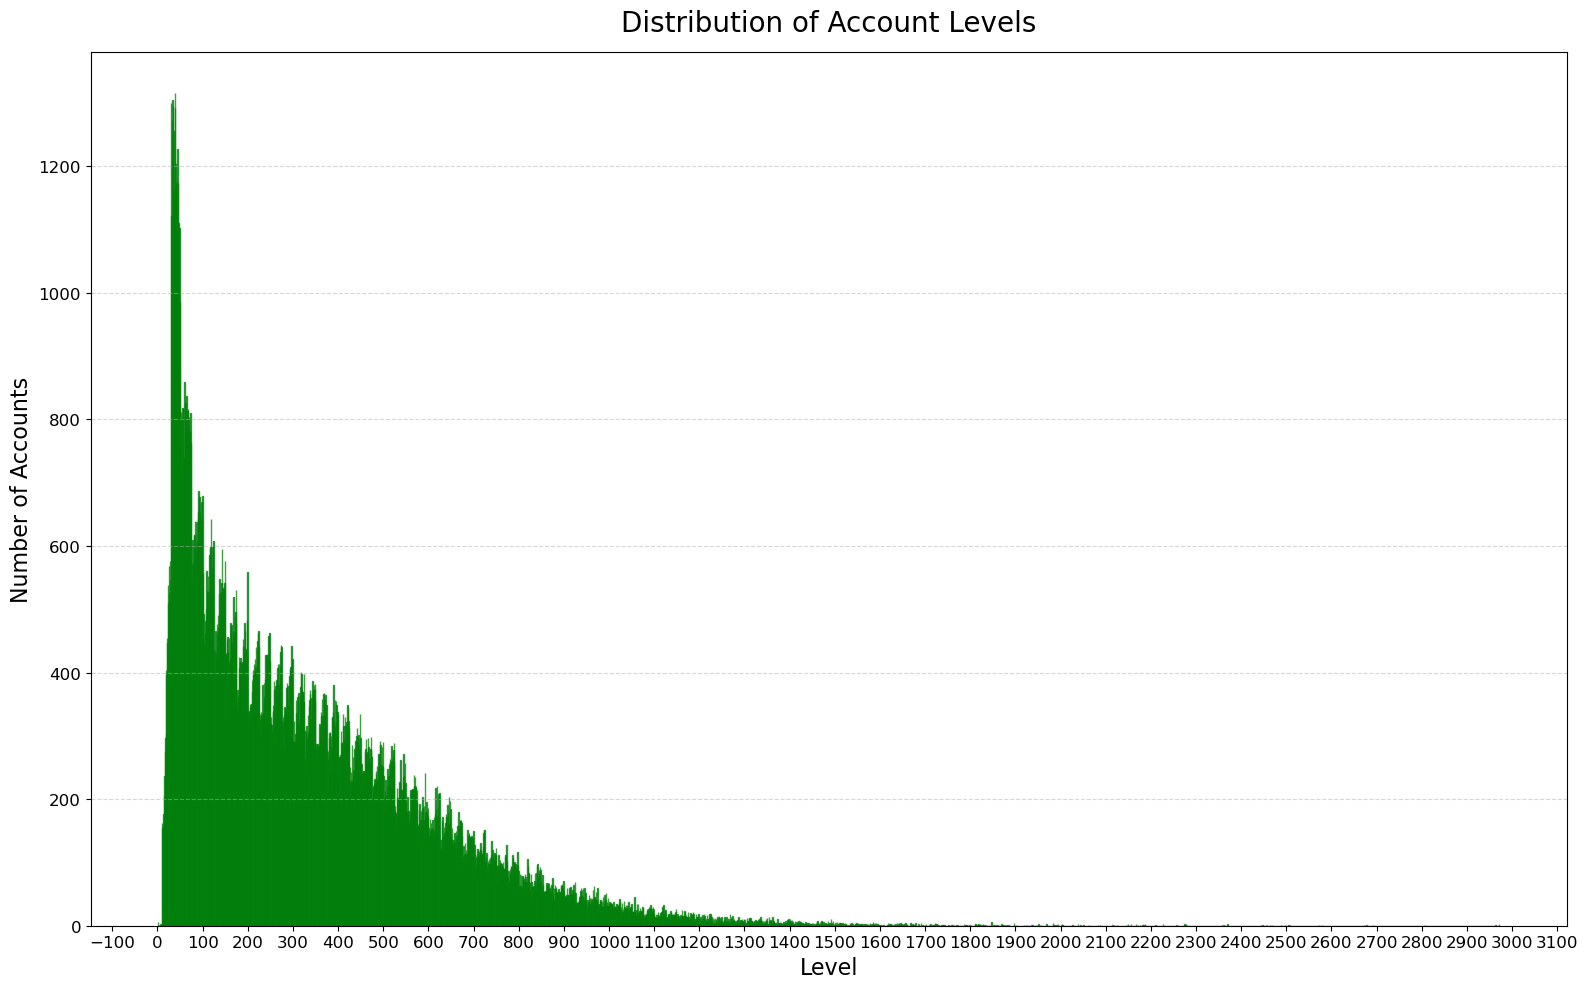

"Qnoxs #17165" Level: 2971


In [4]:
plot_level_distribution(games)
hname, hlevel = get_highest_level_player(games)
print(f"\"{hname}\" Level: {hlevel}")

100%|██████████| 61/61 [00:11<00:00,  5.19it/s]


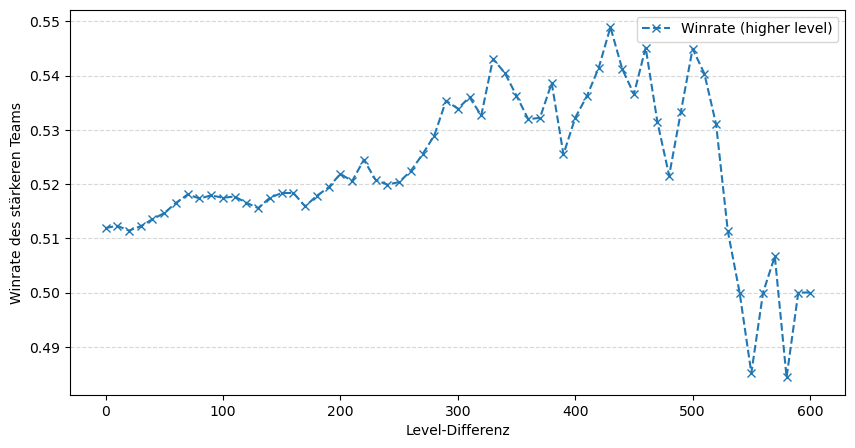

In [5]:
import matplotlib.pyplot as plt

diffs = [i * 10 for i in range(0, 61)]
winrates = [higher_level_winrate(games, d) for d in tqdm(diffs)]

plt.figure(figsize=(10, 5))
plt.plot(diffs, winrates, marker="x", linestyle="--", label="Winrate (higher level)")

#plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
#plt.yticks([i/10 for i in range(0, 11)])

plt.xlabel("Level-Differenz")
plt.ylabel("Winrate des stärkeren Teams")
plt.legend()
plt.show()


100%|██████████| 101/101 [00:22<00:00,  4.53it/s]

[0.508747529463436, 0.5089480412061057, 0.5096759241376646, 0.5097260817784836, 0.5101890799199575, 0.5103019090068118, 0.511272002080985, 0.5114544723797615, 0.5107032225253132, 0.5111355381380234, 0.5115189186522618, 0.5119260432095613, 0.5108483344771155, 0.5115733158641773, 0.5123700858563036, 0.5130978832885043, 0.5134199659946563, 0.5145343338167602, 0.5149536371947238, 0.5166971482760957, 0.5174328693940672, 0.5178180224916021, 0.5186198510411917, 0.518934303106965, 0.5182415776499589, 0.517751732397981, 0.5197321428571429, 0.5197803220701852, 0.5179835191468735, 0.5184104627766599, 0.5183438155136268, 0.5180457746478874, 0.5194012665515256, 0.5204755614266843, 0.5212539184952978, 0.5239096163951655, 0.523940183838661, 0.5252946248922105, 0.5273900645354945, 0.5266875981161695, 0.5243464052287582, 0.5242403550699898, 0.5235462004994649, 0.523845146811296, 0.5256159561986703, 0.5237407101568952, 0.5258155109094836, 0.5253393665158371, 0.5244338498212158, 0.5244544770504138, 0.520

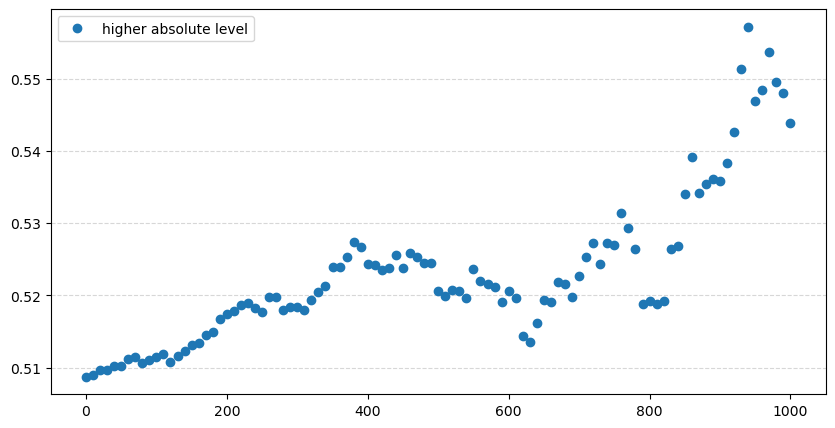

In [6]:
import matplotlib.pyplot as plt

diffs = [i * 10 for i in range(0, 101)]
winrates_higher = [higher_absolute_level_winrate(games, d) for d in tqdm(diffs)]

print(winrates_higher)
plt.figure(figsize=(10, 5))

plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.yticks([i/100 for i in range(0, 101)])
plt.plot(diffs, winrates_higher, marker="o", linestyle="", label="higher absolute level")
plt.legend()
plt.show()

(12019.2, 15783.0)
[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000]
26264 Wins with higher champion level and 1066 Wins with lower champion level of 27330 games
25754 Wins with higher champion level and 874 Wins with lower champion level of 26628 games
25500 Wins with higher champion level and 782 Wins with lower champion level of 26282 games
25290 Wins with higher champion level and 707 Wins with lower champion level of 25997 games
25078 Wins with higher champion level and 655 Wins with lower champion level of 25733 games
24848 Wins with higher champion level and 588 Wins with lower champion level of 25436 games
24586 Wins with higher champion level and 527 Wins with lower champion le

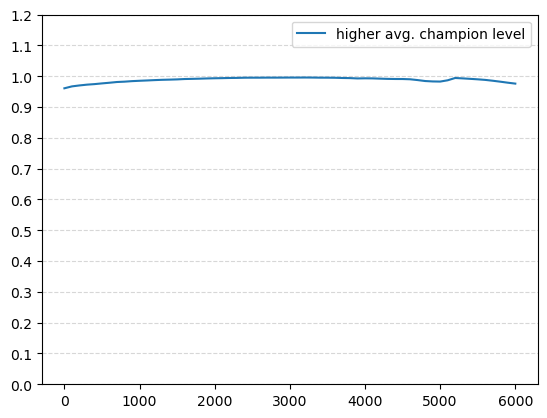

In [7]:
import matplotlib.pyplot as plt
print(get_team_champion_levels(games[1]))
diffs = [i * 100 for i in range(0, 61)]
winrates_higher = []
winrates_lower = []
print(diffs)
for d in diffs:
    wr = higher_champion_level_winrate(games, d)
    winrates_higher.append(wr)
print(winrates_higher)
plt.ylim(0, 1.2)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.yticks([i/10 for i in range(0, 13)])
plt.plot(diffs, winrates_higher, label="higher avg. champion level")
#plt.plot(diffs, winrates_lower, label="lower avg. level")
plt.legend()
plt.show()

In [8]:
print(get_percentage_of_surrendered_games(games))

0.2888320233960885


100%|██████████| 27355/27355 [00:00<00:00, 169363.33it/s]


0.3604975587072774


100%|██████████| 27355/27355 [00:00<00:00, 200383.85it/s]


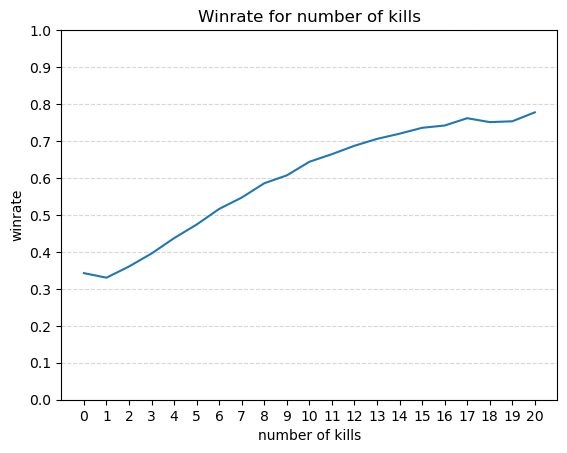

In [9]:
print(get_winratio_for_nr_kills(games, 2))
kills = [i for i in range(0, 21)]
winratio = [get_winratio_for_nr_kills(games, k) for k in kills]
plt.yticks([i/10 for i in range(0, 13)])
plt.xticks(kills)
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.title("Winrate for number of kills")
plt.xlabel("number of kills")
plt.ylabel("winrate")
plt.plot(kills, winratio)
plt.show()

100%|██████████| 27355/27355 [00:00<00:00, 199570.00it/s]


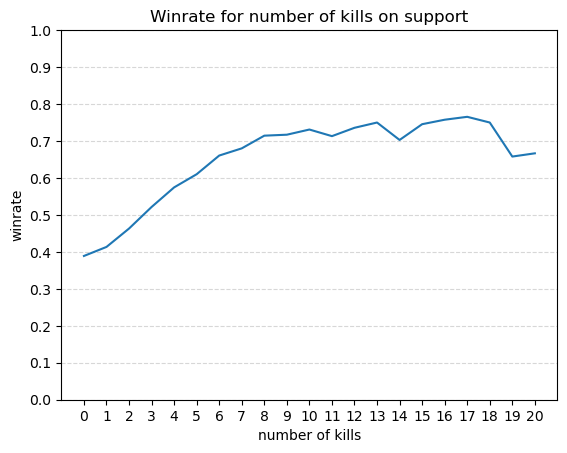

In [10]:
kills = [i for i in range(0, 21)]
winratio = [get_winratio_for_nr_kills_and_role(games, k, "SUPPORT") for k in kills]
plt.yticks([i/10 for i in range(0, 13)])
plt.xticks(kills)
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.title("Winrate for number of kills on support")
plt.xlabel("number of kills")
plt.ylabel("winrate")
plt.plot(kills, winratio)
plt.show()